Train data shape: (60000, 28, 28)
Train label shape: (60000,)
Input shape: [28, 28, 1]
Output size: 10
Iteration:  0  Loss:  35.803852  Accuracy:  0.09375
Iteration:  100  Loss:  1.5807319  Accuracy:  0.671875
Iteration:  200  Loss:  1.4529749  Accuracy:  0.625
Iteration:  300  Loss:  0.95584977  Accuracy:  0.71875
Iteration:  400  Loss:  1.041453  Accuracy:  0.703125
Iteration:  500  Loss:  0.68507284  Accuracy:  0.78125
Iteration:  600  Loss:  0.4297999  Accuracy:  0.859375
Iteration:  700  Loss:  0.857628  Accuracy:  0.734375
Iteration:  800  Loss:  1.1466568  Accuracy:  0.6875
Iteration:  900  Loss:  0.5991901  Accuracy:  0.84375
Test whats up:
1. Test loss:  1.0667152  accuracy:  0.703125
2. Test loss:  0.68869996  accuracy:  0.78125


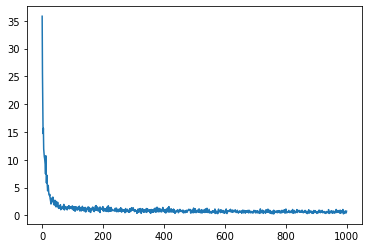

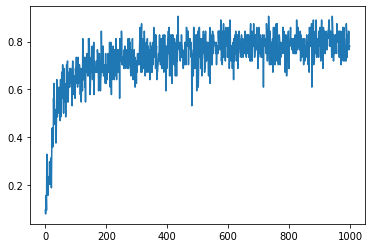

In [5]:
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%tensorflow_version 1.x

from keras.datasets import fashion_mnist
(train_data, train_label), (test_data, test_label) = fashion_mnist.load_data()

print("Train data shape:", train_data.shape)
print("Train label shape:", train_label.shape)

input_size = [28, 28, 1]
output_size = len(np.unique(train_label))

print("Input shape:", input_size)
print("Output size:", output_size)


num_kernels = [input_size[-1], 32, 64, 128]

losses = list()
accuracies = list()

num_iterations = 1000
batch_size = 64
learning_rate = 1e-4

tf.reset_default_graph()

input_data = tf.placeholder(tf.float32, [None] + input_size)
expected_output = tf.placeholder(tf.int32, [None])
one_hotted = tf.one_hot(expected_output, output_size)

current_input = input_data

for i in range(len(num_kernels)-1):
  with tf.variable_scope("conv" + str(i)):
    w = tf.get_variable('w', [3, 3, num_kernels[i], num_kernels[i+1]])
    b = tf.get_variable('b', [num_kernels[i+1]])
    current_input = tf.nn.conv2d(current_input, filter = w, strides = [1, 1, 1, 1], padding = "SAME")
    current_input = tf.add(current_input, b)
    current_input = tf.nn.relu(current_input)
    current_input = tf.nn.max_pool(current_input, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = "SAME")

with tf.variable_scope("fully"):
  feature_length = int(current_input.shape[1] * current_input.shape[2] * current_input.shape[3])
  current_input = tf.reshape(current_input, [-1, feature_length])
  w = tf.get_variable('w', [feature_length, output_size])
  b = tf.get_variable('b', [output_size])
  current_input = tf.matmul(current_input, w)
  current_input = tf.nn.dropout(current_input, rate = 0.1)
  current_input = tf.add(current_input, b)

with tf.variable_scope("loss"):
  loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = current_input, labels = one_hotted))

with tf.variable_scope("optimizer"):
  optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)

with tf.variable_scope("accuracy"):
  correct_predictions = tf.equal(tf.argmax(current_input, 1), tf.argmax(one_hotted, 1))
  accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))

with tf.variable_scope("output"):
  output = current_input

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  for i in range(num_iterations):
    current_batch = random.sample(range(train_data.shape[0]), batch_size)
    batch_x = np.reshape(train_data[current_batch], [batch_size] + input_size)
    batch_y = train_label[current_batch]
    _, l, a = sess.run([optimizer, loss, accuracy], feed_dict = {input_data : batch_x, expected_output : batch_y})
    losses.append(l)
    accuracies.append(a)
    if (i % 100 == 0):
      print("Iteration: ", i, " Loss: ", l, " Accuracy: ", a)
  
  print("Test whats up:")
  current_batch_1 = random.sample(range(test_data.shape[0]), batch_size)
  test_label_1 = test_label[current_batch_1]
  test_img_1 = np.reshape(test_data[current_batch_1], [batch_size] + input_size)
  l1_1, acc_1 = sess.run([loss, accuracy], feed_dict = {input_data : test_img_1, expected_output : test_label_1})

  print("1. Test loss: ", l1_1, " accuracy: ", acc_1)

  current_batch_2 = random.sample(range(test_data.shape[0]), batch_size)
  test_label_2 = test_label[current_batch_2]
  test_img_2 = np.reshape(test_data[current_batch_2], [batch_size] + input_size)
  batch_y = train_label[current_batch]
  l1_2, acc_2 = sess.run([loss, accuracy], feed_dict = {input_data : test_img_2, expected_output : test_label_2})

  print("2. Test loss: ", l1_2, " accuracy: ", acc_2)

plt.figure(1)
plt.plot(losses)

plt.figure(2)
plt.plot(accuracies)
